In [13]:
import sys
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt

sys.path.append("../modules/")
from DS_models_stat import cut_cat, make_histogram, simple_recall, calc_corr_b
from DS_data_transformation import inter_cats
%config InlineBackend.figure_format = 'retina'
matplotlib.rcParams.update({"font.size": 15})

In [11]:
def make_pic(ax, true_cat, det_cats, bins, prm, add_text='', switch=False, lsts=['-', '--', '-.', ':'],
            corr=False):

    for name, lst in zip(det_cats, lsts):
        y = []
        for st, en in zip(bins[:-1], bins[1:]):
            dc = None
            tc = None
            if switch:
                cur_df = det_cats[name].copy()
                cur_df = cur_df[st <= cur_df[prm]]
                cur_df = cur_df[cur_df[prm] < en]
                tc = true_cat
                dc = cur_df
            else:
                cur_df = true_cat.copy()
                cur_df = cur_df[st <= cur_df[prm]]
                cur_df = cur_df[cur_df[prm] < en]
                tc = cur_df
                dc = det_cats[name]
            if len(tc) == 0 or len(dc) == 0:
                y.append(0)
            else:
                if corr:
                    rec = simple_recall(dc, tc)
                    corr_c=1
                    if rec > 0:
                        corr_c = calc_corr_b(dc, tc)
                    y.append(rec * corr_c)
                else:
                    y.append(simple_recall(dc, tc))
        x = (np.array(bins[:-1]) + np.array(bins[1:]))/2
        p, = ax.plot(x, y, ls=lst)
        p.set_label(name + add_text)

In [23]:
def recall_mz(z1=False, corr=False):
    true_cats = {
                'PSZ2(z)+MCXC+ACT' : 
                 pd.read_csv('../Data/united_cats/PSZ2(z)_MCXC_ACT_united.csv')}
    det_cats = {'SZcat(AL)' : pd.read_csv('../Data/detected_cats/SZcatAL.csv'),
               'SZcat(gen)' : pd.read_csv('../Data/detected_cats/SZcatgen.csv'),
               'PSZ2' : pd.read_csv("../Data/original_cats/PSZ2.csv")}
    if z1:
        name = 'PSZ2(z)+MCXC+ACT'
        true_cats[name] = cut_cat(true_cats[name], dict_cut={'z' : [0, 1]})
    
    fig, ax = plt.subplots(1, 2, figsize=(7 * 2, 5), sharey=True)
    #z
    bins = np.arange(0, 1.4, 0.1)
    make_pic(ax[0], true_cats['PSZ2(z)+MCXC+ACT'], {key : det_cats[key] for key in det_cats},
            prm='z', bins=bins, add_text='', corr=corr, lsts=["-.", "-", "--"])
    
    #m500
    bins = [2 ** i for i in np.arange(0, 4, 0.2)]
    make_pic(ax[1], true_cats['PSZ2(z)+MCXC+ACT'], {key : det_cats[key] for key in det_cats},
            prm='M500', bins=bins, add_text='', corr=corr, lsts=["-.", "-", "--"])
    
    
    for i in range(2):
        ax[i].grid(True, axis='both', which='major', linestyle=':')
        ax[i].grid(True, axis='both', which='minor', alpha=0.2, linestyle=':')
        ax[i].legend()
    ax[0].set_xlabel('z')
    ax[1].set_xlabel('M500')
    ax[1].set_xscale('log')
    fig.tight_layout()

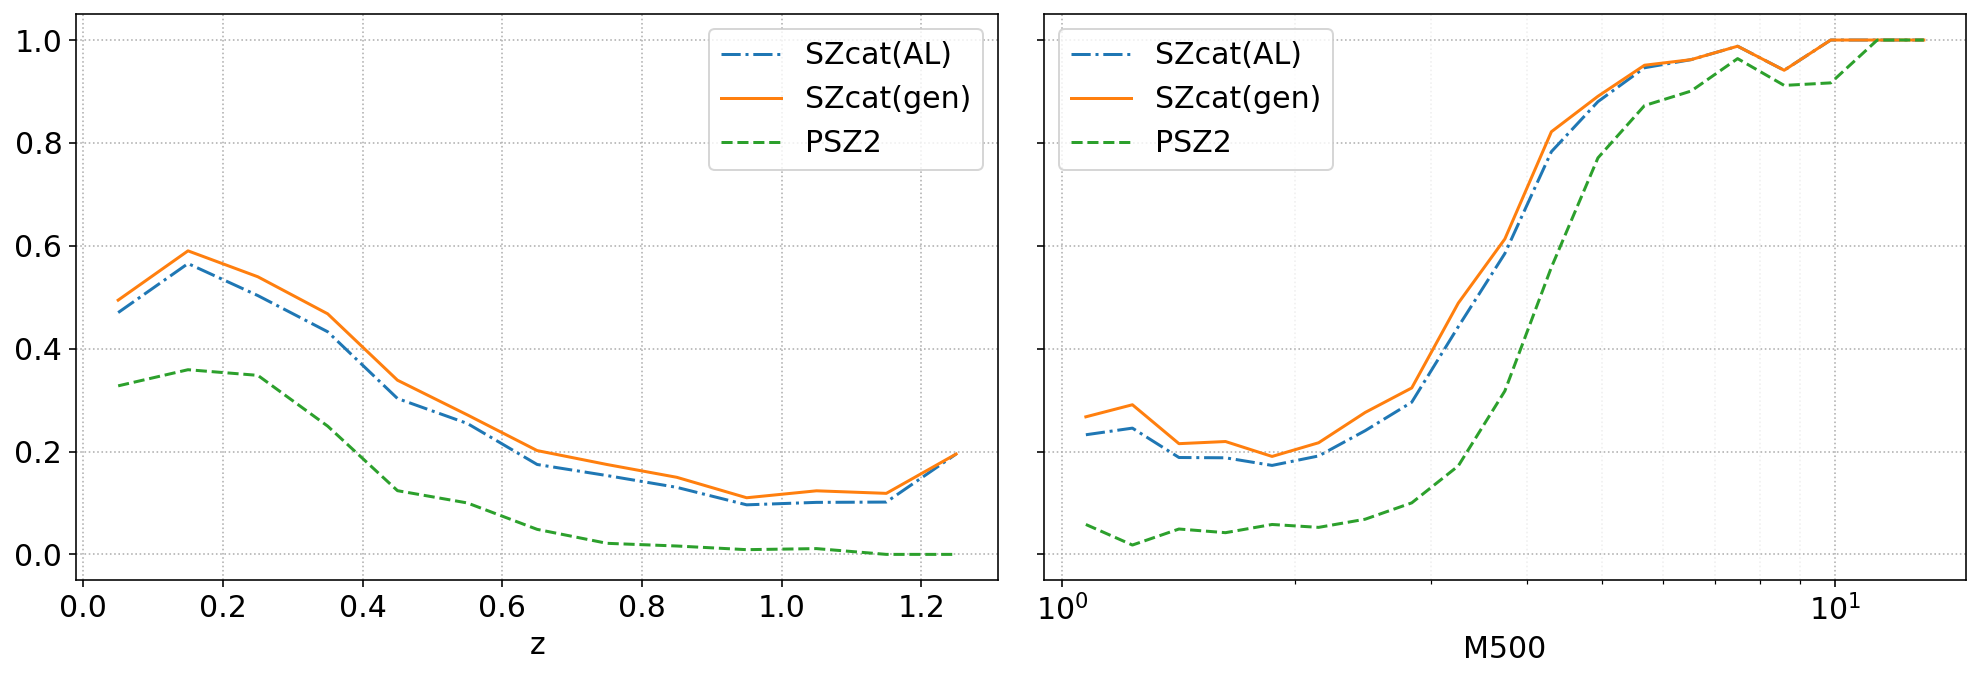

In [24]:
recall_mz()